In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import talib

In [2]:
data = pd.read_csv("../../data/yfinance_data/AMZN_historical_data.csv")

print(data.head())

         Date      Open      High       Low     Close  Adj Close      Volume  \
0  1997-05-15  0.121875  0.125000  0.096354  0.097917   0.097917  1443120000   
1  1997-05-16  0.098438  0.098958  0.085417  0.086458   0.086458   294000000   
2  1997-05-19  0.088021  0.088542  0.081250  0.085417   0.085417   122136000   
3  1997-05-20  0.086458  0.087500  0.081771  0.081771   0.081771   109344000   
4  1997-05-21  0.081771  0.082292  0.068750  0.071354   0.071354   377064000   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [3]:
data.set_index("Date", inplace=True)

## Data Analysis Indicators with Talib

In [4]:
data['SMA_50'] = talib.SMA(data['Close'], timeperiod=50)  # 50-day Simple Moving Average
data['EMA_20'] = talib.EMA(data['Close'], timeperiod=20)  # 20-day Exponential Moving Average


In [5]:
data['RSI'] = talib.RSI(data['Close'], timeperiod=14)


In [6]:
data['MACD'], data['MACD_Signal'], data['MACD_Hist'] = talib.MACD(
    data['Close'], fastperiod=12, slowperiod=26, signalperiod=9
)


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6846 entries, 1997-05-15 to 2024-07-30
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          6846 non-null   float64
 1   High          6846 non-null   float64
 2   Low           6846 non-null   float64
 3   Close         6846 non-null   float64
 4   Adj Close     6846 non-null   float64
 5   Volume        6846 non-null   int64  
 6   Dividends     6846 non-null   float64
 7   Stock Splits  6846 non-null   float64
 8   SMA_50        6797 non-null   float64
 9   EMA_20        6827 non-null   float64
 10  RSI           6832 non-null   float64
 11  MACD          6813 non-null   float64
 12  MACD_Signal   6813 non-null   float64
 13  MACD_Hist     6813 non-null   float64
dtypes: float64(13), int64(1)
memory usage: 802.3+ KB


In [8]:
data['SMA_50']

Date
1997-05-15           NaN
1997-05-16           NaN
1997-05-19           NaN
1997-05-20           NaN
1997-05-21           NaN
                 ...    
2024-07-24    187.364001
2024-07-25    187.229601
2024-07-26    187.138200
2024-07-29    187.082400
2024-07-30    187.044000
Name: SMA_50, Length: 6846, dtype: float64

In [9]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA_50,EMA_20,RSI,MACD,MACD_Signal,MACD_Hist
Date,,,,,,,,,,,,,,
1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


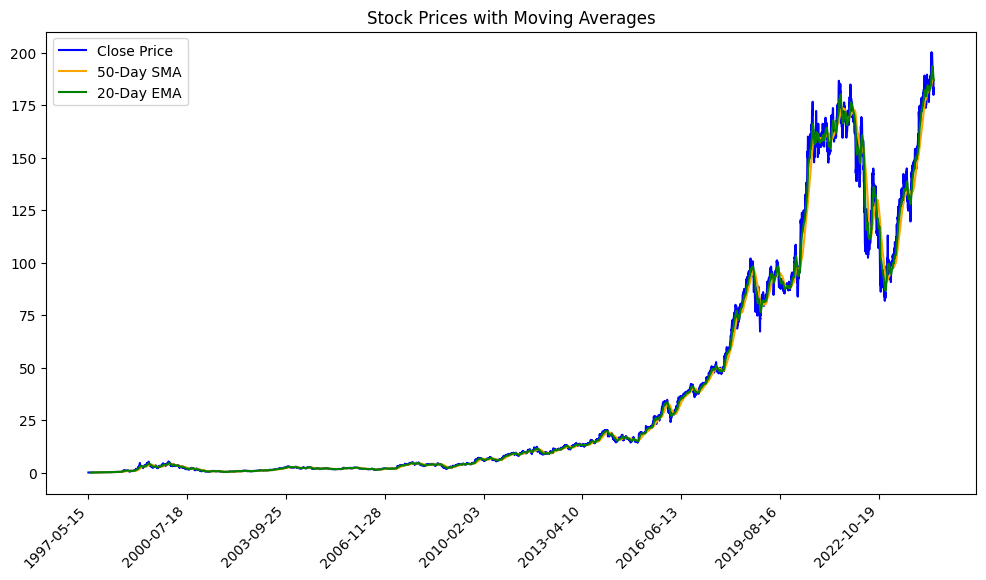

In [10]:

plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label='Close Price', color='blue')
plt.plot(data.index, data['SMA_50'], label='50-Day SMA', color='orange')
plt.plot(data.index, data['EMA_20'], label='20-Day EMA', color='green')
plt.title('Stock Prices with Moving Averages')
plt.xticks(
    data.index[::800], 
    rotation=45,               
    ha='right'                 
)
plt.legend()
plt.show()


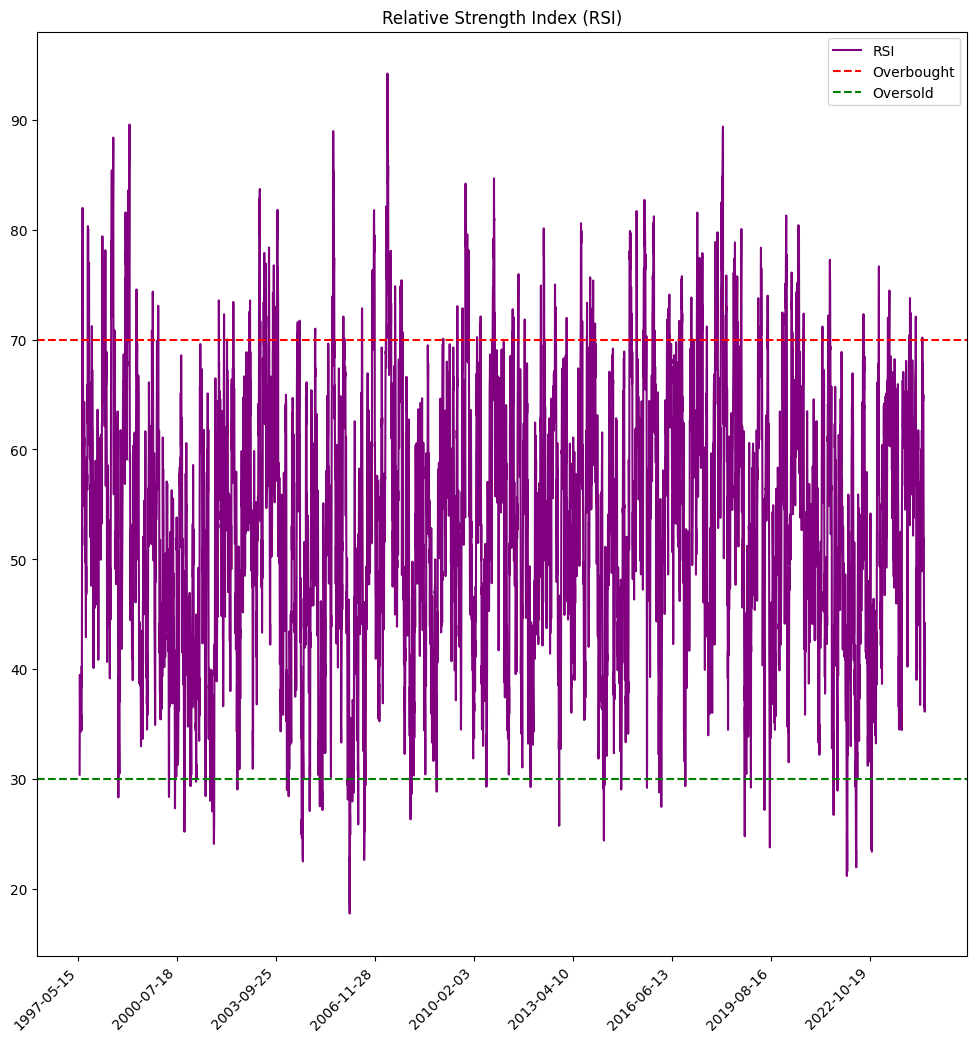

In [11]:
plt.figure(figsize=(12, 12))
plt.plot(data.index, data['RSI'], label='RSI', color='purple')
plt.axhline(70, color='red', linestyle='--', label='Overbought')
plt.axhline(30, color='green', linestyle='--', label='Oversold')
plt.title('Relative Strength Index (RSI)')
plt.xticks(
    data.index[::800], 
    rotation=45,               
    ha='right'                 
)
plt.legend()
plt.show()


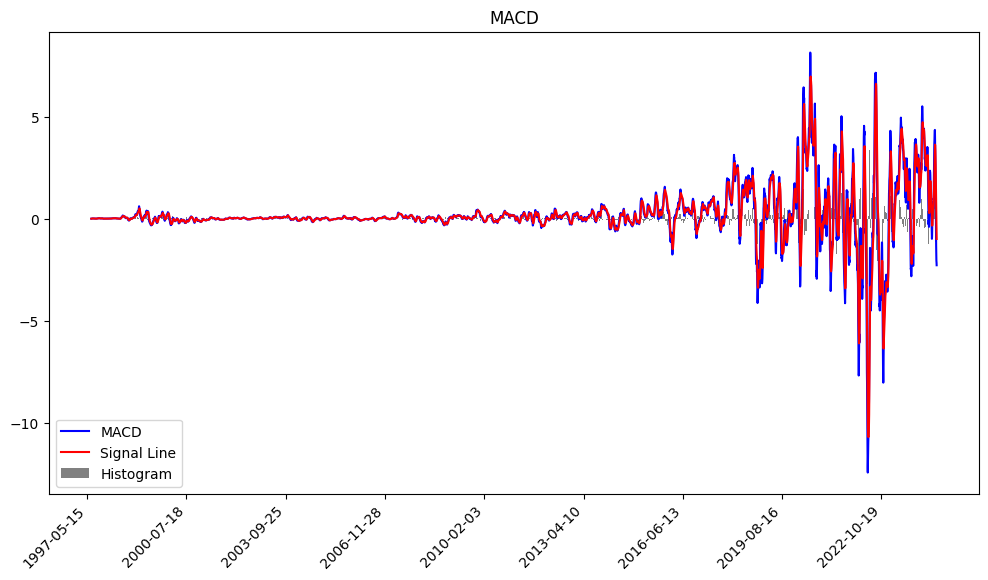

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['MACD'], label='MACD', color='blue')
plt.plot(data.index, data['MACD_Signal'], label='Signal Line', color='red')
plt.bar(data.index, data['MACD_Hist'], label='Histogram', color='gray')
plt.title('MACD')
plt.legend()
plt.xticks(
    data.index[::800], 
    rotation=45,               
    ha='right'                 
)
plt.show()


## Using Pynance for Financial Metrics

In [13]:

# Step 2: Calculate log returns for volatility and Sharpe Ratio
data['Log_Returns'] = np.log(data['Adj Close'] / data['Adj Close'].shift(1))

# Step 3: Calculate Volatility (Standard deviation of log returns)
volatility = data['Log_Returns'].std() * np.sqrt(252)  # Annualized volatility (252 trading days)

# Step 4: Calculate Sharpe Ratio (Assuming risk-free rate = 0)
sharpe_ratio = data['Log_Returns'].mean() / data['Log_Returns'].std() * np.sqrt(252)

# Step 5: Calculate Maximum Drawdown
data['Cumulative_Returns'] = (1 + data['Log_Returns']).cumprod()
data['Cumulative_Max'] = data['Cumulative_Returns'].cummax()
data['Drawdown'] = data['Cumulative_Returns'] / data['Cumulative_Max'] - 1
max_drawdown = data['Drawdown'].min()

In [14]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA_50,EMA_20,RSI,MACD,MACD_Signal,MACD_Hist,Log_Returns,Cumulative_Returns,Cumulative_Max,Drawdown
Date,,,,,,,,,,,,,,,,,,
1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,-0.124461,0.875539,0.875539,0.000000
1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,-0.012114,0.864933,0.875539,-0.012114
1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,-0.043623,0.827202,0.875539,-0.055208
1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,-0.136269,0.714480,0.875539,-0.183954


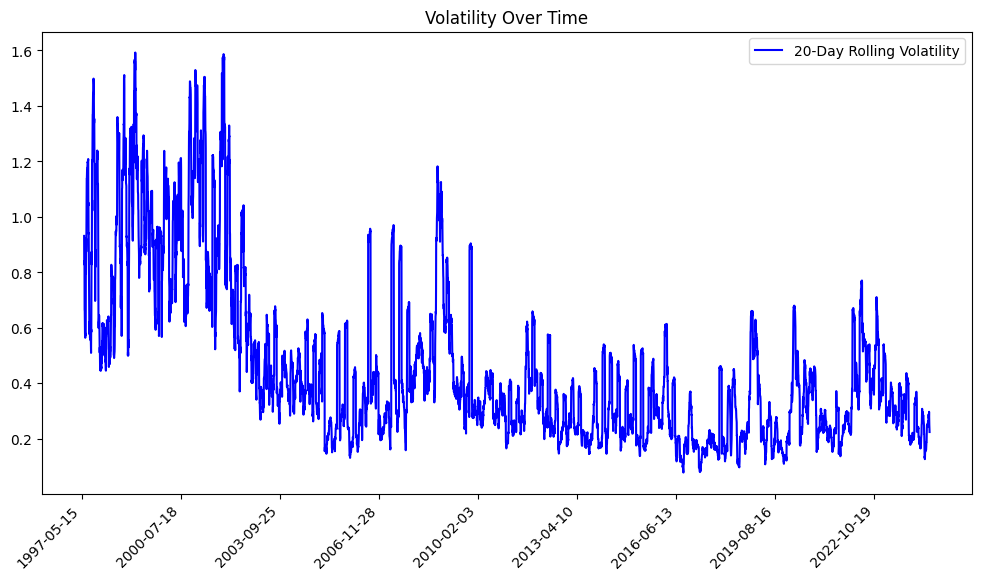

In [15]:
data['Rolling_Volatility'] = data['Log_Returns'].rolling(window=20).std() * np.sqrt(252)

plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Rolling_Volatility'], label='20-Day Rolling Volatility', color='blue')
plt.title('Volatility Over Time')
plt.legend()
plt.xticks(
    data.index[::800], 
    rotation=45,               
    ha='right'                 
)
plt.show()


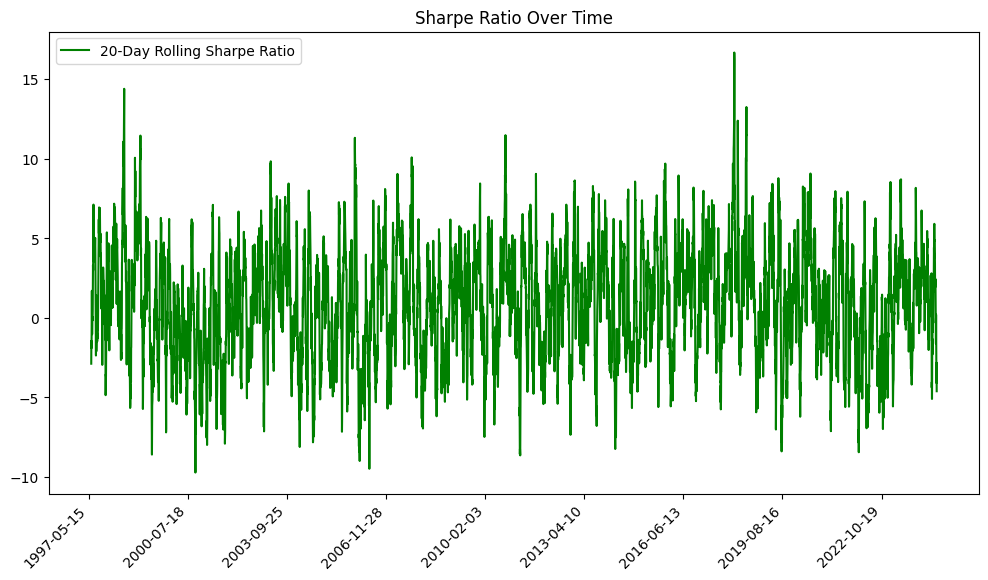

In [16]:
data['Rolling_Sharpe'] = data['Log_Returns'].rolling(window=20).mean() / data['Log_Returns'].rolling(window=20).std() * np.sqrt(252)

plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Rolling_Sharpe'], label='20-Day Rolling Sharpe Ratio', color='green')
plt.title('Sharpe Ratio Over Time')
plt.legend()
plt.xticks(
    data.index[::800], 
    rotation=45,               
    ha='right'                 
)
plt.show()


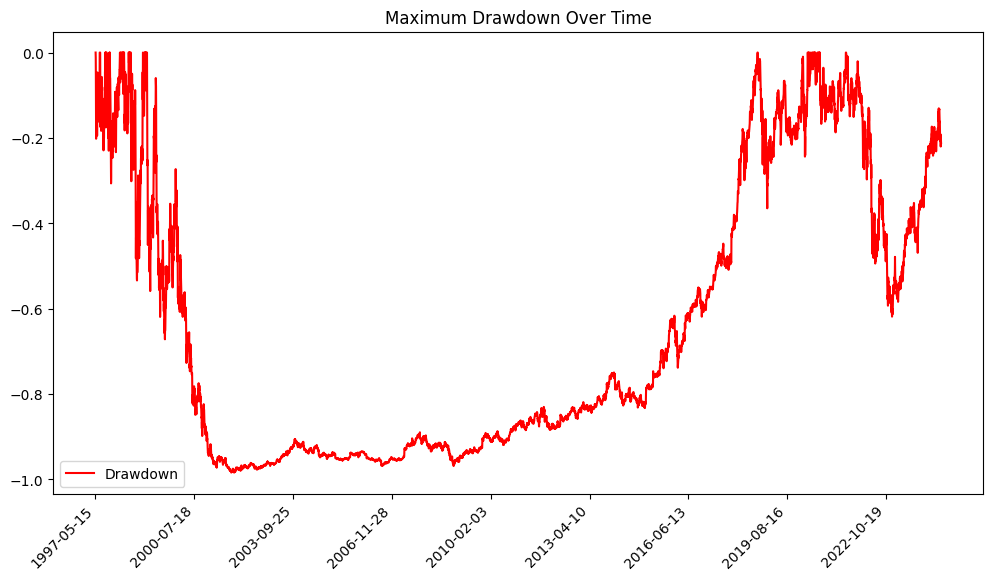

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Drawdown'], label='Drawdown', color='red')
plt.title('Maximum Drawdown Over Time')
plt.legend()
plt.xticks(
    data.index[::800], 
    rotation=45,               
    ha='right'                 
)
plt.show()


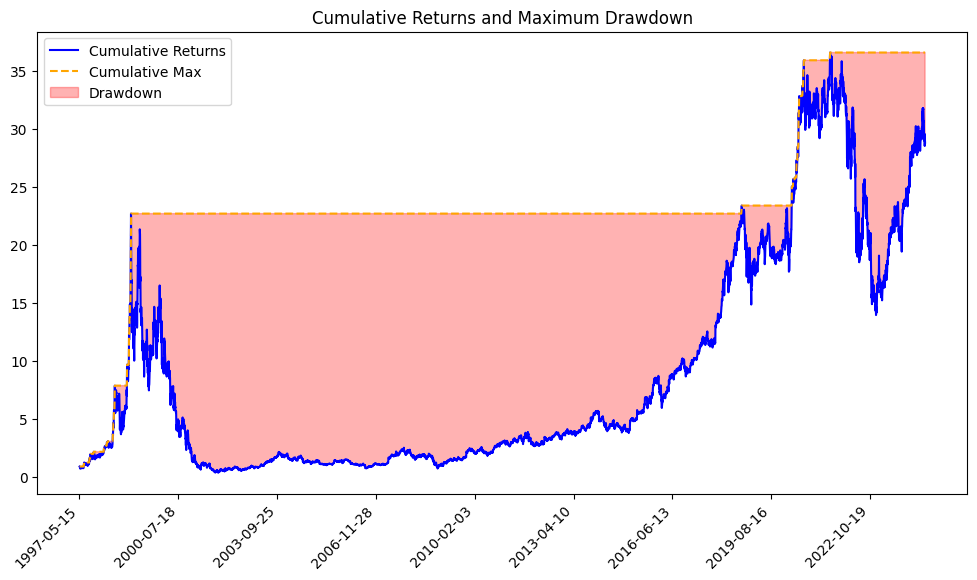

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Cumulative_Returns'], label='Cumulative Returns', color='blue')
plt.plot(data.index, data['Cumulative_Max'], label='Cumulative Max', color='orange', linestyle='--')
plt.fill_between(data.index, data['Cumulative_Returns'], data['Cumulative_Max'], where=(data['Cumulative_Returns'] < data['Cumulative_Max']), color='red', alpha=0.3, label='Drawdown')
plt.title('Cumulative Returns and Maximum Drawdown')
plt.legend()
plt.xticks(
    data.index[::800], 
    rotation=45,               
    ha='right'                 
)
plt.show()